# Deadly Visualizations!!!

![Image](../images/viz_types_portada.png)

## Setup

First we need to create a basic setup which includes:

- Importing the libraries.

- Reading the dataset file (source [Instituto Nacional de Estadística](https://www.ine.es/ss/Satellite?L=es_ES&c=Page&cid=1259942408928&p=1259942408928&pagename=ProductosYServicios%2FPYSLayout)).

- Create a couple of columns and tables for the analysis.

__NOTE:__ some functions were already created in order to help you go through the challenge. However, feel free to perform any code you might need.

In [1]:
# some imports

import sys
sys.path.insert(0, "../modules")
import pandas as pd
import cufflinks as cf
import plotly.express as px
import re
import module as mod # functions are include in module.py.
import numpy as np
import statsmodels as sm
cf.go_offline()

In [2]:
# read dataset

deaths = pd.read_csv('../data/7947.csv', sep=';', thousands='.')

deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [3]:
# add some columns...you'll need them later

deaths['cause_code'] = deaths['Causa de muerte'].apply(mod.cause_code)
deaths['cause_group'] = deaths['Causa de muerte'].apply(mod.cause_types)
deaths['cause_name'] = deaths['Causa de muerte'].apply(mod.cause_name)

deaths.info()
deaths.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
 5   cause_code       301158 non-null  object
 6   cause_group      301158 non-null  object
 7   cause_name       301158 non-null  object
dtypes: int64(2), object(6)
memory usage: 18.4+ MB


,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721,001-102,Multiple causes,I-XXII.Todas las causas
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523,001-102,Multiple causes,I-XXII.Todas las causas
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611,001-102,Multiple causes,I-XXII.Todas las causas
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568,001-102,Multiple causes,I-XXII.Todas las causas
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830,001-102,Multiple causes,I-XXII.Todas las causas


In [4]:
# lets check the categorical variables

var_list = ['Sexo', 'Edad', 'Periodo', 'cause_code', 'cause_name', 'cause_group']

categories = mod.cat_var(deaths, var_list)
categories

,categorical_variable,number_of_possible_values,values
0,cause_code,117,"[001-102, 001-008, 001, 002, 003, 004, 005, 00..."
1,cause_name,117,"[I-XXII.Todas las causas, I.Enfermedades infec..."
2,Periodo,39,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201..."
3,Edad,22,"[Todas las edades, Menos de 1 año, De 1 a 4 añ..."
4,Sexo,3,"[Total, Hombres, Mujeres]"
5,cause_group,2,"[Multiple causes, Single cause]"


In [5]:
# we need also to create a causes table for the analysis

causes_table = deaths[['cause_code', 'cause_name']].drop_duplicates().sort_values(by='cause_code').reset_index(drop=True)

causes_table

,cause_code,cause_name
0,001,Enfermedades infecciosas intestinales
1,001-008,I.Enfermedades infecciosas y parasitarias
2,001-102,I-XXII.Todas las causas
3,002,Tuberculosis y sus efectos tardíos
4,003,Enfermedad meningocócica
...,...,...
112,098,Suicidio y lesiones autoinfligidas
113,099,Agresiones (homicidio)
114,100,Eventos de intención no determinada
115,101,Complicaciones de la atención médica y quirúrgica


In [6]:
# And some space for free-style Pandas!!! (e.g.: df['column_name'].unique())

tabla = pd.pivot_table(deaths,index=['cause_name'], values = 'Total',
                              columns=['Periodo'],
                              aggfunc=np.sum)

tabla


Periodo,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cause_name,,,,,,,,,,,,,,,,,,,,,
Accidentes de tráfico,24584,22788,18984,20704,22288,22680,24848,26724,29592,32872,...,10352,9344,8464,7656,7228,7492,7520,7560,7772,7584
"Accidentes por fuego, humo y sustancias calientes",1432,1200,956,1464,1244,1104,832,884,904,1044,...,656,760,616,692,576,728,692,740,792,580
Agresiones (homicidio),1496,1284,1228,1560,1812,1620,1628,1828,1396,1364,...,1348,1316,1336,1212,1260,1268,1140,1128,1300,1100
"Ahogamiento, sumersión y sofocación accidentales",4956,4700,4864,4788,4716,4872,5120,5544,5556,5520,...,9168,8268,8800,9028,8832,9480,10688,10928,12464,12360
Artritis reumatoide y osteoartrosis,800,556,668,716,760,820,784,964,1060,1192,...,1308,1448,1472,1568,1296,1436,1728,1700,1980,2196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XVI.Afecciones originadas en el periodo perinatal,12760,12460,11016,9936,8184,6608,6456,6428,5224,5412,...,3600,3324,3332,3316,2852,3112,2696,2548,2516,2520
"XVII.Malformaciones congénitas, deformidades y anomalías cromosómicas",9332,9252,8104,7696,7008,6488,6308,6092,6052,5528,...,3556,3884,3680,3292,3032,3312,3208,3384,3256,3372
"XVIII.Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte",63256,63364,63164,67932,63416,66888,62252,48152,48464,44476,...,44344,43088,42448,40068,35788,33932,38016,32132,37332,40352


In [7]:
Accidentes = tabla.loc["Artritis reumatoide y osteoartrosis"]
Accidentes

Periodo
1980     800
1981     556
1982     668
1983     716
1984     760
1985     820
1986     784
1987     964
1988    1060
1989    1192
1990    1248
1991    1272
1992    1156
1993    1184
1994    1372
1995    1336
1996    1284
1997    1328
1998    1316
1999    1396
2000    1340
2001    1400
2002    1448
2003    1316
2004    1316
2005    1236
2006    1252
2007    1200
2008    1252
2009    1308
2010    1448
2011    1472
2012    1568
2013    1296
2014    1436
2015    1728
2016    1700
2017    1980
2018    2196
Name: Artritis reumatoide y osteoartrosis, dtype: int64

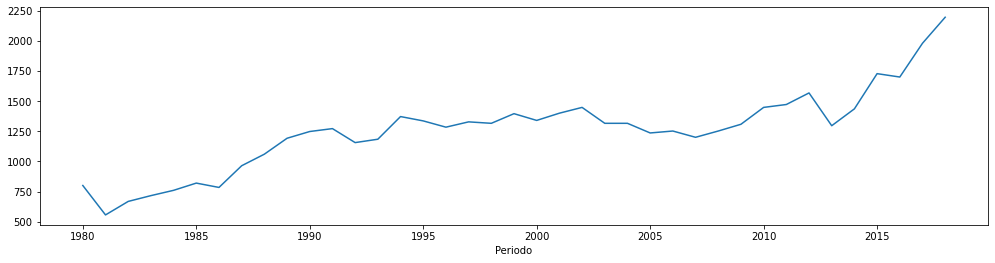

In [8]:
Accidentes.plot(x='Periodo', y='Total', kind='line', figsize=(17,4));

## Lets make some transformations

Eventhough the dataset is pretty clean, the information is completely denormalized as you could see. For that matter a collection of methods (functions) are available in order to generate the tables you might need:

- `row_filter(df, cat_var, cat_values)` => Filter rows by any value or group of values in a categorical variable.

- `nrow_filter(df, cat_var, cat_values)` => The same but backwards. 

- `groupby_sum(df, group_vars, agg_var='Total', sort_var='Total')` => Add deaths by a certain variable.

- `pivot_table(df, col, x_axis, value='Total')`=> Make some pivot tables, you might need them...

__NOTE:__ be aware that the filtering methods can perform a filter at a time. Feel free to perform the filter you need in any way you want or feel confortable with.

In [9]:
# Example 1

dataset = mod.row_filter(deaths, 'Sexo', ['Total'])
dataset = mod.row_filter(dataset, 'Edad', ['Todas las edades'])
dataset.head()

,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721,001-102,Multiple causes,I-XXII.Todas las causas
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523,001-102,Multiple causes,I-XXII.Todas las causas
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568,001-102,Multiple causes,I-XXII.Todas las causas
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611,001-102,Multiple causes,I-XXII.Todas las causas
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2012,402950,001-102,Multiple causes,I-XXII.Todas las causas


In [10]:
# Example 2

group = ['cause_code','Periodo']
dataset = mod.groupby_sum(deaths, group)
dataset.head()


,cause_code,Periodo,Total
0,001-102,2018,1710884
1,001-102,2017,1698092
2,001-102,2015,1690272
3,001-102,2016,1642444
4,001-102,2012,1611800


In [11]:
# Example 3

dataset = mod.pivot_table(dataset, 'cause_code', 'Periodo')
dataset.head()
dts = dataset[["001", "003", "007", "Periodo"]]
dts


cause_code,001,003,007,Periodo
0,1620,2008,0,1980
1,1404,1656,0,1981
2,1308,1240,0,1982
3,1212,1072,0,1983
4,1228,964,0,1984
5,1056,636,0,1985
6,1120,744,0,1986
7,1008,552,0,1987
8,956,460,0,1988
9,888,364,220,1989


In [12]:

dts.iplot(kind='line', y = ["001", "003", "007"], x = "Periodo",
                     title='Total Deaths',
                     yTitle='Total',
                     xTitle='Periodo',
                     fill = True)



## ...and finally, show me some insights with Plotly!!!

Of course, you can always check the [class notes](https://github.com/ih-datapt-mad/dataptmad1121_lessons/tree/main/module-2) for further info. 

In [13]:
# Cufflinks histogram

Accidentes.iplot(kind='line',
                     title='Total Deaths',
                     yTitle='Total',
                     xTitle='Periodo',
                     fill = True)


In [14]:
# Cufflinks bar plot

Accidentes.iplot(kind='bar',
                  title='Artritis',
                  yTitle='Total',
                  xTitle='Años')


In [15]:

dts.iplot(kind='line',
                   x='Periodo',
                   xTitle='Total',
                   yTitle='Años',
                   title='Muertes')


In [16]:
# Cufflinks scatter plot

dts.iplot(x='Periodo', kind = "scatter",
                      y = ["001", "003", "007"],
                      mode = "markers",
                      xTitle='Total',
                      yTitle='Años',
                      title='Muertes')




In [17]:
dts.iplot(kind="scatter",
              x='Periodo', y = ["001", "003", "007"],
              mode='markers',
              colors=["orange","blue", "black"],  size=8, symbol="circle-open-dot",
              bestfit=True, bestfit_colors=["green"],
              xTitle='Total',
              yTitle='Años',
              title='Muertes')